<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#linear_regression">Linear Regression</a></li>
        <li><a href="#logistic_regression">Logistic Regression</a></li>
        <li><a href="#knearestneighbors">K Nearest Neighbors</a></li>
        <li><a href="#support_vector_machines">Support Vector Machines</a></li>
        <li><a href="#random_forest">Random Forest</a></li>
        <li><a href="kmeans">K Means</a></li>
    </ol>
</div>
<br>
<hr>

<div id="linear_regression">
<h1 id="linear_regression"><center>Linear Regression Example 1</center></h1>
</div>

<h4>Algorithm Explanation</h4>
<h4>Category : Supervised</h4>
<h4>Dataset Used : Generated</h4>


Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = 10,8


<h2>Data Details</h2>

### `Generated own data`:

- **no_of_skills (INDEPENDENT VARIABLE(s))** 
- **salaries (DEPENDENT VARIABLE)** 


<h2 id="generating_data_for_linear_regression_1">Generating the data in</h2>

In [2]:
# Generating data using numpy's linspace function
# Reshape is usually done as we have a single feature

no_of_skills = np.linspace(1,30, 500, dtype=int)


## Generating buffer in order to make our salary more realistic. Generating 500 buffer numbers and adding the same
buffer = np.random.randint(1, 40000, 500)
buffer = buffer


## Generating salaries with the help no_of_skills. Making it a dependent variable
salaries = (no_of_skills * 8000) + buffer
no_of_skills[:5], buffer[:5], salaries[:5]

(array([1, 1, 1, 1, 1]),
 array([19422, 38580, 29342, 10491,   727]),
 array([27422, 46580, 37342, 18491,  8727]))

<h3>Creating Dataframe with generated data</h3>

In [3]:
df = pd.DataFrame({'no_of_skills':no_of_skills, 'salaries' : salaries})
df.head()

,no_of_skills,salaries
0,1,27422
1,1,46580
2,1,37342
3,1,18491
4,1,8727


<h2 id="data_exploration_for_linear_regression_1">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [4]:
# summarize the data
df.describe()

,no_of_skills,salaries
count,500.000000,500.000000
mean,15.002000,138982.548000
std,8.396607,68048.880136
min,1.000000,8727.000000
25%,8.000000,81757.500000
50%,15.000000,140139.000000
75%,22.000000,196694.500000
max,30.000000,269726.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   no_of_skills  500 non-null    int32
 1   salaries      500 non-null    int32
dtypes: int32(2)
memory usage: 4.0 KB


we can plot each of these features:

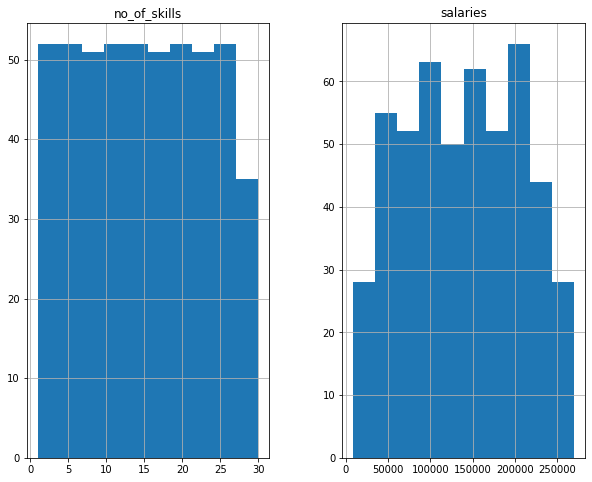

In [6]:
viz = df[['no_of_skills','salaries']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

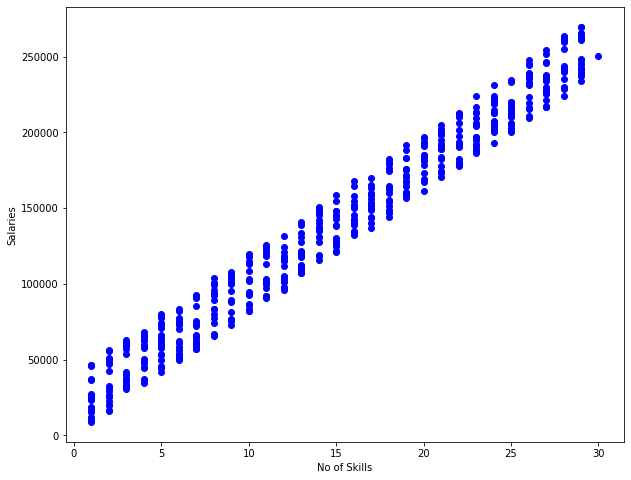

In [7]:
plt.scatter(df.no_of_skills, df.salaries,  color='blue')
plt.xlabel("No of Skills")
plt.ylabel("Salaries")
plt.show()

#### Splitting train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

Since the test data has not been used to train the model, the model has no knowledge of the outcome of these data points. Therefore can be used for out-of-sample testing.

#### Reshaping as per fitting needs

In [8]:
# This is quite Tricky Step
no_of_skills = no_of_skills.reshape(-1,1)
salaries = salaries.reshape(-1,1)

#### Splitting Data

In [9]:
from sklearn.model_selection import train_test_split
# By default the training and testing will be in 70-30 ratio. Can be changed using test_size or train_size parameter
X_train, X_test, Y_train, Y_test = train_test_split(no_of_skills, salaries)

#### Modeling

In [10]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
# training Linear Regression model on training data
linReg.fit(X_train, Y_train)
# The coefficients
print ('Coefficients: ', linReg.coef_)
print ('Intercept: ',linReg.intercept_)

Coefficients:  [[7948.11196784]]
Intercept:  [19738.3343717]


__Coefficient__ and __Intercept__ in the linear regression, are the parameters of the fit line. 

#### Predict and plot

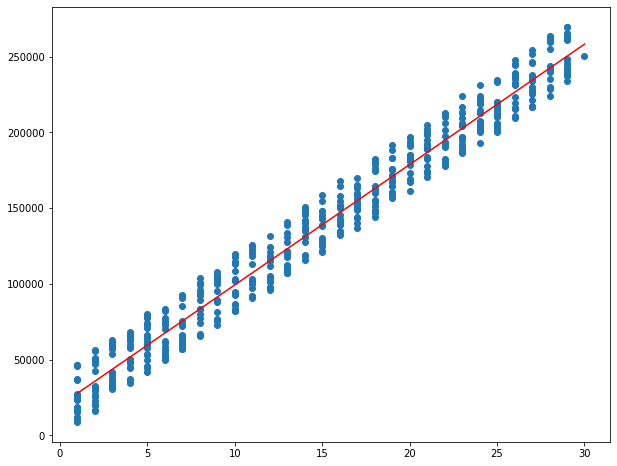

In [11]:
# Predicting salaries for all the values of no_of_skills
predicted_salaries = linReg.predict(no_of_skills)
plt.scatter(no_of_skills, salaries)
plt.plot(no_of_skills, predicted_salaries, color='r')

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

In [12]:
y_pred = linReg.predict(X_test)

from sklearn.metrics import r2_score

print("Mean absolute error           : %.2f" % np.mean(np.absolute(y_pred - Y_test)))
print("Residual sum of squares (MSE) : %.2f" % np.mean((y_pred - Y_test) ** 2))
print("R2-score                      : %.2f" % r2_score(y_pred , Y_test) )

Mean absolute error           : 9526.12
Residual sum of squares (MSE) : 125974060.07
R2-score                      : 0.97



<h1><center>Linear Regression Example 2</center></h1>


<h4>Algorithm Explanation</h4>
<h4>Category : Supervised</h4>
<h4>Dataset Used : Car Prices</h4>


Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

### Importing Needed packages

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = 12,10


<h2>Data Details</h2>

### `CarPrice.csv`:

- **car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price (INDEPENDENT VARIABLE(s))** 

- **price (DEPENDENT VARIABLE)** 


<h2>Reading data from file..</h2>

In [14]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<h2 id="data_exploration_for_linear_regression_1">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [15]:
# summarize the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

we can plot each of these features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223E82AFD08>,
      dtype=object)

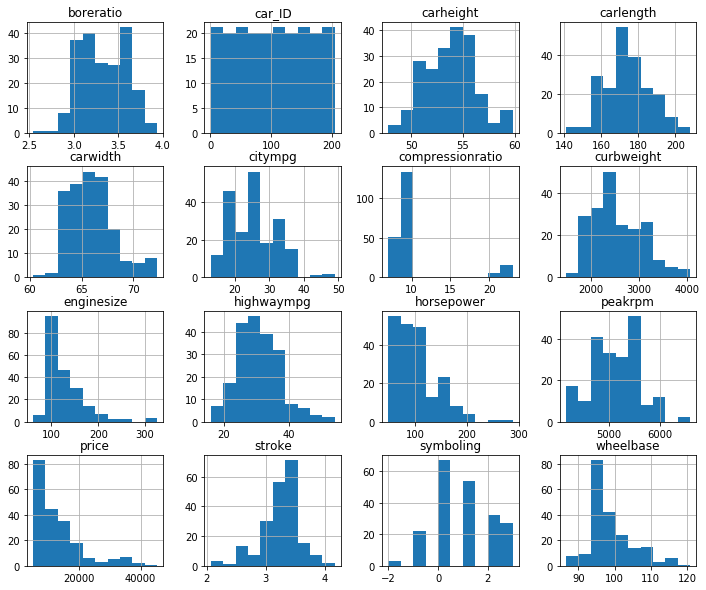

In [17]:
df.hist()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

#### Feature Selection

In [18]:
## Performing a simple feature selection

X = df[['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']].values
Y = df[['price']].values

#### Splitting train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

Since the test data has not been used to train the model, the model has no knowledge of the outcome of these data points. Therefore can be used for out-of-sample testing.

#### Splitting Data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

#### Modeling

In [20]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
# training Linear Regression model on training data
linReg.fit(X_train, Y_train)
# The coefficients
print ('Coefficients: ', linReg.coef_)
print ('Intercept: ',linReg.intercept_)

Coefficients:  [[ 2.20653988e+02  1.06303933e+02 -8.19165557e+01  3.84364054e+02
   1.92695679e+02  2.62186529e+00  1.04491518e+02 -1.14760018e+03
  -2.90235226e+03  3.02307613e+02  4.19305581e+01  2.39461928e+00
  -1.77746930e+02  6.96865457e+01]]
Intercept:  [-42849.94730267]


__Coefficient__ and __Intercept__ in the linear regression, are the parameters of the fit line. 

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

In [21]:
y_pred = linReg.predict(X_test)

from sklearn.metrics import r2_score

print("Mean absolute error           : %.2f" % np.mean(np.absolute(y_pred - Y_test)))
print("Residual sum of squares (MSE) : %.2f" % np.mean((y_pred - Y_test) ** 2))
print("R2-score                      : %.2f" % r2_score(y_pred , Y_test) )

Mean absolute error           : 1838.16
Residual sum of squares (MSE) : 7014994.61
R2-score                      : 0.85


<div id ="logistic_regression">
<h1><center>Logistic Regression</center></h1>
</div>

<h4>Algorithm Explanation</h4>
<h4>Category : Supervised (Classification)</h4>
<h4>Dataset Used : Customer churn</h4>


<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

### Importing Needed packages

In [22]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12,10


<h2>Data Details</h2>

<h2>About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents



<h2>Reading data from file..</h2>

In [23]:
df = pd.read_csv("Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h2 id="data_exploration_for_linear_regression_1">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [24]:
# summarize the data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


we can plot each of these features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223E8B68508>,
      dtype=object)

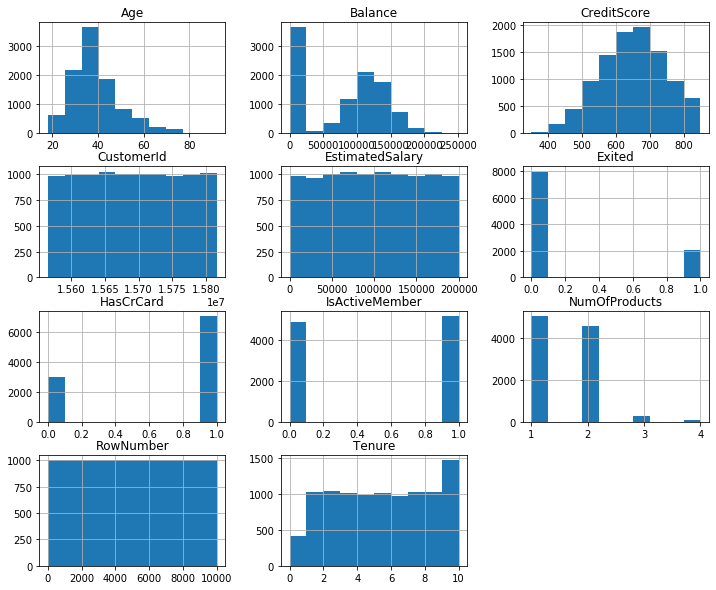

In [26]:
df.hist()

#### Data Preprocessing

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography2'] = le.fit_transform(df['Geography'])
df['Gender2'] = le.fit_transform(df['Gender'])

#### Feature Selection

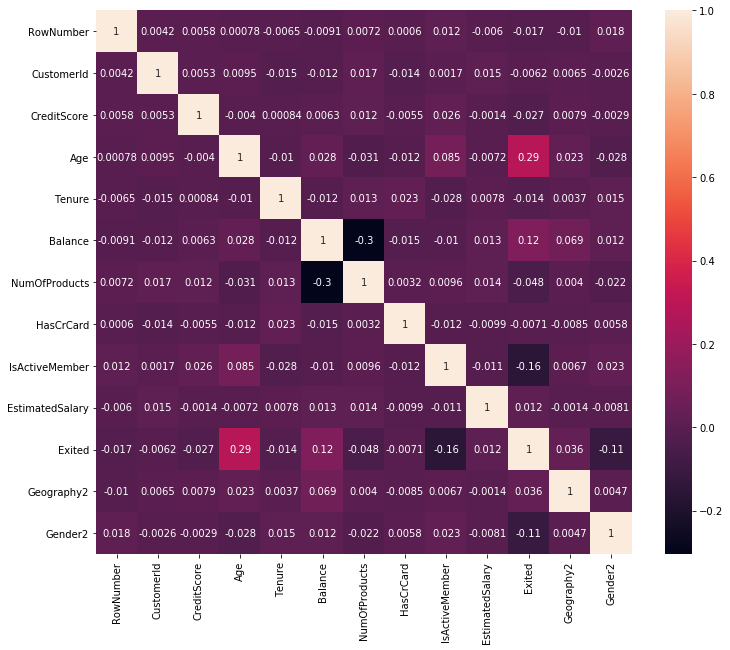

In [28]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [29]:
## Performing a simple feature selection

X = df[['CreditScore', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Geography2']].values
Y = df[['Exited']].values

#### Splitting train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

Since the test data has not been used to train the model, the model has no knowledge of the outcome of these data points. Therefore can be used for out-of-sample testing.

#### Splitting Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

#### Modeling

In [31]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
# training Linear Regression model on training data
LogReg.fit(X_train, Y_train)
# The coefficients
print ('Coefficients: ', LogReg.coef_)
print ('Intercept: ',LogReg.intercept_)

Coefficients:  [[-4.66005421e-03  4.51989841e-02 -1.49822394e-03 -8.11811288e-04
  -1.18269534e-04 -1.41529509e-03 -1.34672956e-06  4.41464033e-04]]
Intercept:  [-0.00014853]


E:\Applications\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


__Coefficient__ and __Intercept__ in the linear regression, are the parameters of the fit line. 

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

In [32]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg.predict(X_test)
ypred_prob = LogReg.predict_proba(X_test)
ypred_prob

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, y_pred)

E:\Applications\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7924

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [33]:
from sklearn.metrics import log_loss
log_loss(Y_test, ypred_prob)

0.477668303544815

<div id="knearestneighbors">
<h1><center>K Nearest Neighbors</center></h1>
</div>

<h4>Algorithm Explanation</h4>
<h4>Category : Supervised (Classification & Regression)</h4>
<h4>Dataset Used : Iris Dataset</h4>

**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.


<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

### Importing Needed packages

In [34]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12,10


<h2>Data Details</h2>


<h2>Reading data from file..</h2>

In [35]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h2 id="data_exploration_for_linear_regression_1">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [36]:
# summarize the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


we can plot each of these features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223E9792C88>,
      dtype=object)

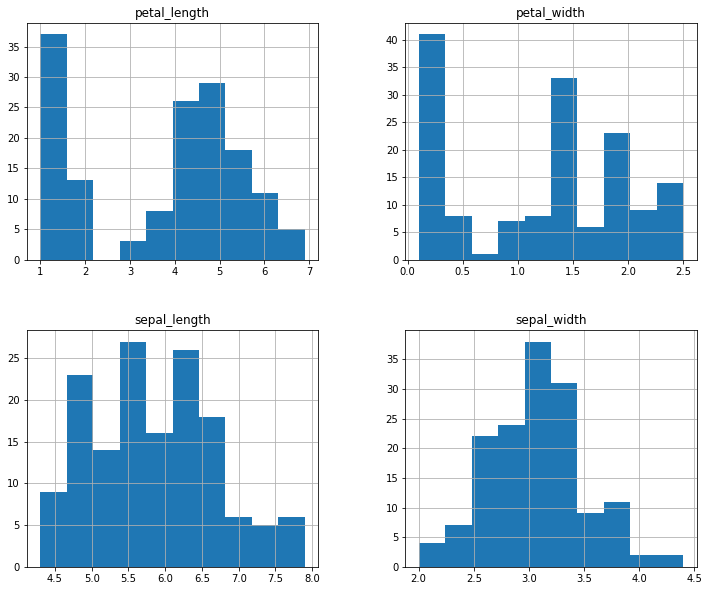

In [38]:
df.hist()

#### Feature Selection

In [39]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
Y = df[['species']].values

#### Splitting train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

Since the test data has not been used to train the model, the model has no knowledge of the outcome of these data points. Therefore can be used for out-of-sample testing.

#### Splitting Data

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

#### Modeling

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# training Linear Regression model on training data
knn.fit(X_train, Y_train)# The coefficients


E:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

In [42]:
from sklearn import metrics

y_pred = knn.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Test set Accuracy:  0.9736842105263158


<div id="support_vector_machines">
<h1><center>Support Vector Machine</center></h1>
</div>

<h4>Algorithm Explanation</h4>
<h4>Category : Supervised (Classification)</h4>
<h4>Dataset Used : Telecom Churn</h4>


SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

### Importing Needed packages

In [43]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12,10


<h2>Data Details</h2>


<h2>Reading data from file..</h2>

In [44]:
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h2 id="data_exploration_for_linear_regression_1">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [45]:
# summarize the data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


we can plot each of these features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223E9DF2848>,
      dtype=object)

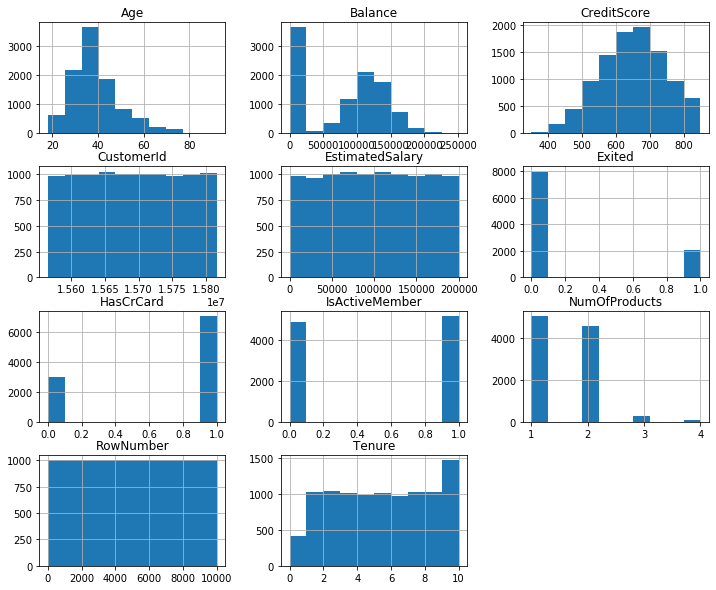

In [47]:
df.hist()

#### Feature Selection

In [48]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']].values
Y = df[['Exited']].values

#### Splitting train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

Since the test data has not been used to train the model, the model has no knowledge of the outcome of these data points. Therefore can be used for out-of-sample testing.

#### Splitting Data

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

#### Modeling

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [50]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
# training Linear Regression model on training data
svc.fit(X_train, Y_train)# The coefficients


E:\Applications\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

In [51]:
y_pred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1958
           1       0.00      0.00      0.00       542

    accuracy                           0.78      2500
   macro avg       0.39      0.50      0.44      2500
weighted avg       0.61      0.78      0.69      2500



E:\Applications\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div id="random_forest">
<h1><center>Random Forest</center></h1>
</div>

<h4>Algorithm Explanation</h4>
<h4>Category : Supervised (Classification & Regression)</h4>
<h4>Dataset Used : Telecom Churn</h4>


Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

### Importing Needed packages

In [52]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12,10


<h2>Data Details</h2>


<h2>Reading data from file..</h2>

In [53]:
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h2 id="data_exploration_for_linear_regression_1">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [54]:
# summarize the data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


we can plot each of these features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223EB573148>,
      dtype=object)

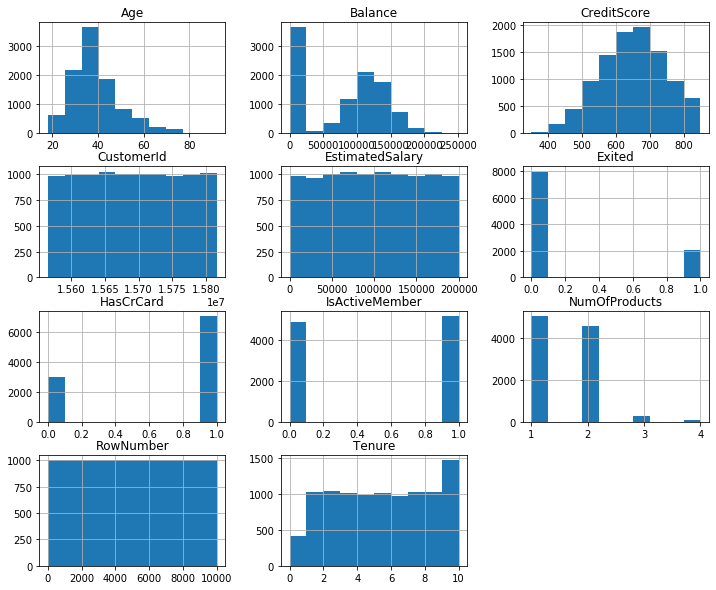

In [56]:
df.hist()

#### Feature Selection

In [57]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']].values
Y = df[['Exited']].values

#### Splitting train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

Since the test data has not been used to train the model, the model has no knowledge of the outcome of these data points. Therefore can be used for out-of-sample testing.

#### Splitting Data

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

#### Modeling

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.
The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# training Linear Regression model on training data
rfc.fit(X_train, Y_train)


E:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

In [60]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1983
           1       0.80      0.44      0.57       517

    accuracy                           0.86      2500
   macro avg       0.83      0.70      0.74      2500
weighted avg       0.85      0.86      0.84      2500



<div id="kmeans">
<h1><center>K Means</center></h1>
</div>

<h4>Algorithm Explanation</h4>
<h4>Category : Unsupervised (Classification & Regression)--> CLUSTERING
</h4>
<h4>Dataset Used : Generated Data</h4>


k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

### Importing Needed packages

In [61]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

plt.rcParams['figure.figsize'] = 12,10

E:\Applications\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)



<h2>Data Details</h2>


<h2>Generating data..</h2>

In [62]:
X, y = make_blobs(n_samples=2000,centers=3, cluster_std=0.9)
X[:5],y[:5]

(array([[ 0.31207402,  6.63963314],
        [-6.02575034,  3.19991943],
        [ 0.8277261 ,  5.65341509],
        [-7.60552852,  2.2135422 ],
        [ 1.06258244,  4.68230856]]),
 array([0, 1, 0, 1, 0]))

<h2 id="data_exploration_for_linear_regression_1">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

we can plot each of these features:

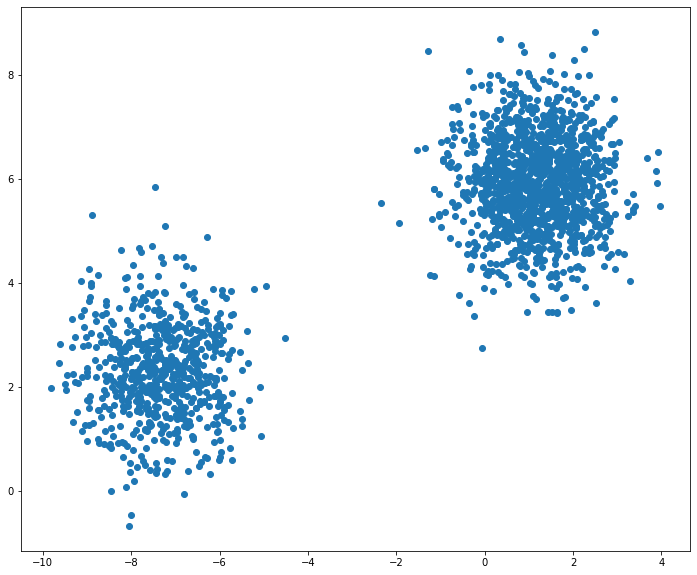

In [65]:
plt.scatter(X[:,0],X[:,1])

#### Modeling

- Randomly select centroids
- Calculate distances of points from centroid
- Select new centroids and repeat until centroids have 
  stabilized


In [66]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Printing cluster centers

In [67]:
val = km.cluster_centers_
for v in val:
    print("plt.scatter(",v[0],", ",v[1],", s=50)",sep='')

plt.scatter(1.5574078505562625, 5.266899735068675, s=50)
plt.scatter(-7.359514132921629, 2.317031048640753, s=50)
plt.scatter(0.8314786660762181, 6.5237184496618905, s=50)


#### Visualizing centers

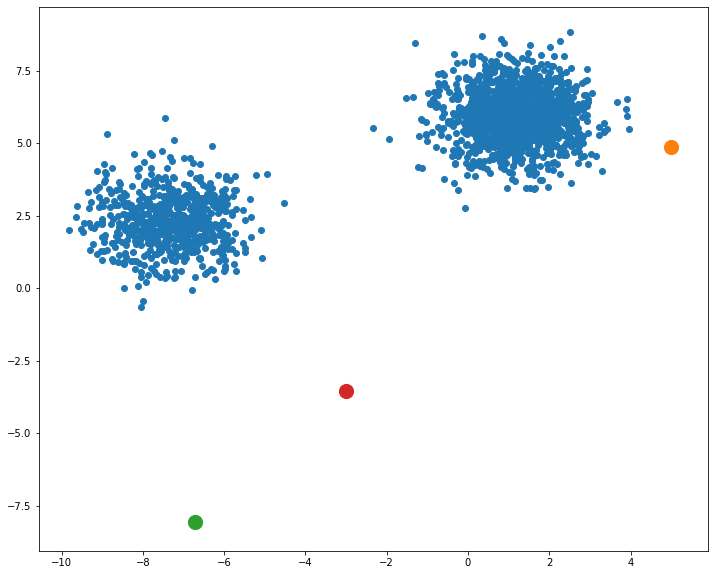

In [68]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(5.001317145025639, 4.865359474320162, s=200)
plt.scatter(-6.71075921638164, -8.057938928690964, s=200)
plt.scatter(-3.004598708982158, -3.5300020075539864, s=200)